In [1]:
import pandas as pd
df = pd.read_csv('dataset/df_20like.csv')
df.head()

,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,456,"1,89525E+18",Thu Feb 27 23:22:00 +0000 2025,700.0,Blm pernah terjadi di dunia sekalipun. 3 Presi...,"1,89525E+18",https://pbs.twimg.com/ext_tw_video_thumb/18952...,NaN,in,"DKI Jakarta, Indonesia",41.0,382.0,125.0,https://x.com/Franken_blues/status/18952530778...,"1,30124E+18",Franken_blues
1,457,"1,89525E+18",Thu Feb 27 22:50:59 +0000 2025,121.0,Kesempatan langka Bpk Presiden Prabowo berbica...,"1,89525E+18",NaN,NaN,in,Sumbermanjing,2.0,3.0,68.0,https://x.com/Outstandjing/status/189524527217...,59363362,Outstandjing
2,458,"1,89522E+18",Thu Feb 27 21:24:59 +0000 2025,212.0,3 Oktober 2011 dan saat belum berkuasa menjadi...,"1,89522E+18",https://pbs.twimg.com/media/Gk0v2DBWsAABvzo.jpg,NaN,in,Indonesia,3.0,31.0,98.0,https://x.com/Nicho_Silalahi/status/1895223630...,75519742,Nicho_Silalahi
3,459,"1,89515E+18",Thu Feb 27 16:36:15 +0000 2025,72.0,Kadrun sudah mulai turun ke jalan artinya Pres...,"1,89515E+18",NaN,NaN,in,di bawah langit tanpa batas,3.0,50.0,17.0,https://x.com/silent_night21/status/1895150965...,"1,86108E+18",silent_night21
4,460,"1,89513E+18",Thu Feb 27 14:59:26 +0000 2025,95.0,Pengelolaan hutan bukan sekadar memiliki izin ...,"1,89513E+18",https://pbs.twimg.com/ext_tw_video_thumb/18951...,NaN,in,Jakarta,11.0,138.0,25.0,https://x.com/RajaJuliAntoni/status/1895126604...,438832278,RajaJuliAntoni


In [2]:
df.describe()

,Unnamed: 0,favorite_count,quote_count,reply_count,retweet_count
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,2971.671646,1110.142235,34.121693,108.199813,308.679116
std,2260.638078,3569.004189,181.416949,222.765908,943.290290
min,456.000000,20.000000,0.000000,0.000000,0.000000
25%,1259.000000,136.000000,1.000000,10.000000,28.000000
50%,2062.000000,269.000000,5.000000,35.000000,64.000000
75%,3579.000000,721.000000,16.000000,103.000000,207.000000
max,12187.000000,69918.000000,4441.000000,2915.000000,17464.000000


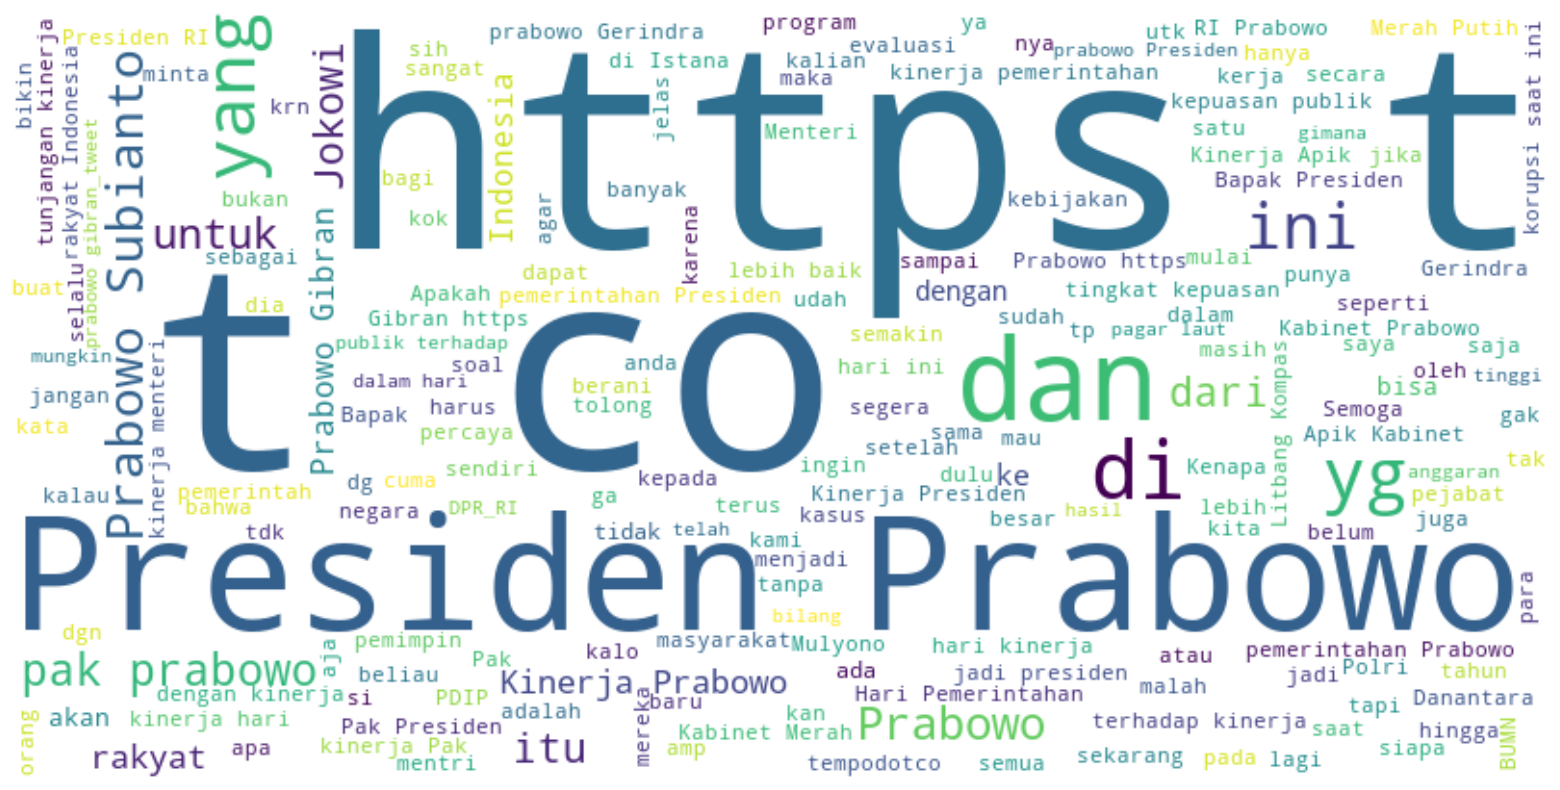

In [ ]:
df1 = df.copy()
df1 = df1[df1['label'] == 'Netral'] 
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_text = ' '.join(df1['full_text'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                    max_font_size=150,  # Ukuran font maksimal lebih besar
                    relative_scaling=1.0,  # Pertahankan ukuran relatif kata penting
                    min_font_size=10).generate(all_text)

# Tampilkan
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# labelling deepseek

In [6]:
import pandas as pd

df = pd.read_csv('dataset/-/prabowo_23-08.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      5562 non-null   int64  
 1   created_at               5562 non-null   object 
 2   favorite_count           5562 non-null   int64  
 3   full_text                5562 non-null   object 
 4   id_str                   5562 non-null   int64  
 5   image_url                1240 non-null   object 
 6   in_reply_to_screen_name  2621 non-null   object 
 7   lang                     5562 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              5562 non-null   int64  
 10  reply_count              5562 non-null   int64  
 11  retweet_count            5562 non-null   int64  
 12  tweet_url                5562 non-null   object 
 13  user_id_str              5562 non-null   int64  
 14  username                

In [ ]:
import pandas as pd
import requests
import time
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Konfigurasi API
API_URL = "https://api.deepseek.com/v1/chat/completions"
API_KEY = ""  
HEADERS = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}
MAX_WORKERS = 10
DELAY_PER_REQUEST = 0.25

# Fungsi untuk klasifikasi sentimen
def analyze_sentiment(tweet, retries=3):
    prompt = (
        "Tentukan sentimen dari tweet berikut (positif/negatif/netral). "
        "Hanya jawab dengan satu kata: positif, negatif, atau netral.\n\n"
        f"Tweet: \"{tweet}\""
    )

    data = {
        "model": "deepseek-chat",
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.1
    }

    for attempt in range(retries):
        try:
            response = requests.post(API_URL, headers=HEADERS, json=data, timeout=10)
            response.raise_for_status()
            result = response.json()
            label = result["choices"][0]["message"]["content"].strip().lower()
            time.sleep(DELAY_PER_REQUEST)  
            return label
        except Exception as e:
            if attempt == retries - 1:
                print(f"\nError pada tweet: '{tweet[:50]}...' - {str(e)}")
                return "error"
            time.sleep(2 ** attempt)  

tweets = df["full_text"].tolist()

def process_batch():
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        futures = {executor.submit(analyze_sentiment, tweet): i for i, tweet in enumerate(tweets)}
        for future in tqdm(as_completed(futures), total=len(tweets), desc="Melabeli Tweet"):
            idx = futures[future]
            try:
                df.at[idx, "label"] = future.result()
            except Exception as e:
                df.at[idx, "label"] = "error"

process_batch()

# Simpan hasil
df.to_csv("prabowo_08_labeled.csv", index=False)
print("\n✅ Pelabelan selesai! Hasil disimpan di 'prabowo_08_labeled.csv'")

Melabeli Tweet: 100%|██████████| 5562/5562 [41:04<00:00,  2.26it/s]  


✅ Pelabelan selesai! Hasil disimpan di 'prabowo_08_labeled.csv'


In [5]:
import time

start_time = time.time()
with ThreadPoolExecutor(max_workers=12) as executor:
    results = list(executor.map(analyze_sentiment, tweets[:100]))
rps = 100 / (time.time() - start_time)
print(f"Actual RPS: {rps:.1f}")

KeyboardInterrupt: 